action 00,01,10,11 依序是往右,上,左,下 

In [1]:
import numpy as np
from qiskit import *

In [2]:
Unitary_Matrix_1 = [[0,0,0,1],
                    [1,0,0,0],         
                    [0,1,0,0],
                    [0,0,1,0]]
Unitary_Matrix_2 = [[0,1,0,0],
                    [0,0,1,0],
                    [0,0,0,1],
                    [1,0,0,0]]

'''
Go_Down = Unitary_Matrix_1
Go_Right = Unitary_Matrix_1
Go_Up = Unitary_Matrix_2
Go_Left = Unitary_Matrix_2
'''

'\nGo_Down = Unitary_Matrix_1\nGo_Right = Unitary_Matrix_1\nGo_Up = Unitary_Matrix_2\nGo_Left = Unitary_Matrix_2\n'

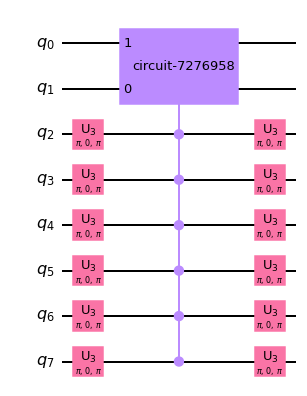

In [85]:
#建好往右的control-unitary
qc = QuantumCircuit(2)
qc.unitary(Unitary_Matrix_1,[0,1])
control_qc = qc.control(6)
control_qc.draw('mpl')
Go_Right = control_qc.to_gate()
test_circuit = QuantumCircuit(8,name='Right')
test_circuit.x([2,3,4,5,6,7])
test_circuit.append(Go_Right,[2,3,4,5,6,7,1,0]) #Gate的第0個位置對到Quantum Circuit的第2個位置，以此類推
test_circuit.x([2,3,4,5,6,7])
Decision_right_control_unitary = test_circuit.to_gate() #Decision_right_control_unitary就是往右的control-unitary

New_circuit = QuantumCircuit(8)
New_circuit.append(Decision_right_control_unitary,[0,1,2,3,4,5,6,7])
New_circuit.decompose().decompose().draw('mpl')

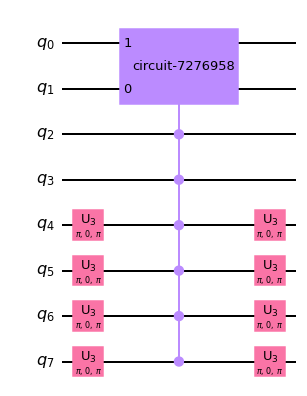

In [86]:
#建好往下的control-unitary
#往下的unitary和往右的unitary相同，只是target qubit不同！還有q2,q3沒有x gate,因為要探測的是11，11代表往下
test2_circuit = QuantumCircuit(8,name = 'Down')
Go_Down = control_qc.to_gate()
test2_circuit.x([4,5,6,7])
test2_circuit.append(Go_Down,[2,3,4,5,6,7,1,0])
test2_circuit.x([4,5,6,7])
Decision_down_control_unitary = test2_circuit.to_gate() #Decision_down_control_unitary就是往下的control-unitary

New_circuit1 = QuantumCircuit(8)
New_circuit1.append(Decision_down_control_unitary,[0,1,2,3,4,5,6,7])
New_circuit1.decompose().decompose().draw('mpl')

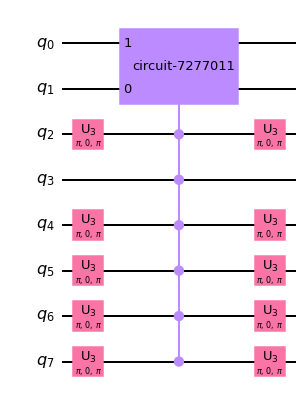

In [87]:
#建好往上的control-unitary
qc2 = QuantumCircuit(2)
qc2.unitary(Unitary_Matrix_2,[0,1])
control_qc2 = qc2.control(6)
control_qc2.draw('mpl')
Go_Up = control_qc2.to_gate()
test3_circuit = QuantumCircuit(8,name = 'Up')
test3_circuit.x([2,4,5,6,7])
test3_circuit.append(Go_Up,[2,3,4,5,6,7,1,0])
test3_circuit.x([2,4,5,6,7])
Decision_up_control_unitary = test3_circuit.to_gate() #Decision_up_control_unitary就是往上的control-unitary

New_circuit2 = QuantumCircuit(8)
New_circuit2.append(Decision_up_control_unitary,[0,1,2,3,4,5,6,7])
New_circuit2.decompose().decompose().draw('mpl')

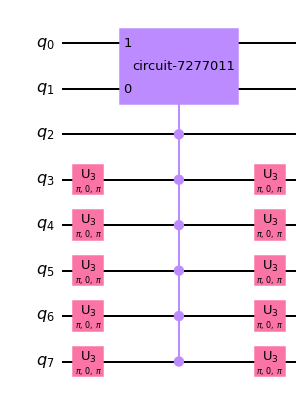

In [88]:
#建好往左的control-unitary
test3_circuit = QuantumCircuit(8,name = 'Left')
Go_Left = control_qc2.to_gate()
test3_circuit.x([3,4,5,6,7])
test3_circuit.append(Go_Left,[2,3,4,5,6,7,1,0])
test3_circuit.x([3,4,5,6,7])
Decision_left_control_unitary = test3_circuit.to_gate() #Decision_left_control_unitary就是往左的control-unitary

New_circuit3 = QuantumCircuit(8)
New_circuit3.append(Decision_left_control_unitary,[0,1,2,3,4,5,6,7])
New_circuit3.decompose().decompose().draw('mpl')

In [98]:
#判斷是否掉到洞裡面的gate
#看有幾個洞就要幾個gate

end_status_1 = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]
                

end_status_2 = [[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [100]:
#create error_status_transform_1 and error_status_transform_2
qc = QuantumCircuit(4)
qc.unitary(end_status_1,[3,2,1,0])
qc_control = qc.control(4)
qc_control.draw('mpl')
end_status_transform_1 = qc_control.to_gate()

qc2 = QuantumCircuit(4)
qc2.unitary(end_status_2,[3,2,1,0])
qc2_control = qc2.control(4)
end_status_transform_2 = qc2_control.to_gate()

In [101]:
#6號洞
hole1 = QuantumCircuit(8,name = 'Hole1')
hole1.x([0,2])
hole1.append(end_status_transform_1,[0,1,2,3,4,5,6,7])
hole1.x([0,2])
hole1.decompose().draw('mpl')
hole1 = hole1.to_gate()


In [102]:
#8號洞
hole2 = QuantumCircuit(8,name = 'Hole2')
hole2.x(0)
hole2.append(end_status_transform_1,[0,1,2,3,4,5,6,7])
hole2.x(0)
hole2 = hole2.to_gate()

In [103]:
#12號洞
hole3 = QuantumCircuit(8,name = 'Hole3')
hole3.x(1)
hole3.append(end_status_transform_1,[0,1,2,3,4,5,6,7])
hole3.x(1)
hole3 = hole3.to_gate()

In [104]:
#13號洞
hole4 = QuantumCircuit(8,name = 'Hole4')
hole4.x([2,3])
hole4.append(end_status_transform_1,[0,1,2,3,4,5,6,7])
hole4.x([2,3])
hole4 = hole4.to_gate()

In [105]:
#判斷是否結束的gate
#只需要一個gate因為終點只有一個
finish = QuantumCircuit(8,name = 'Finish')
finish.x([1,3])
finish.append(end_status_transform_2,[0,1,2,3,4,5,6,7])
finish.x([1,3])
finish = finish.to_gate()

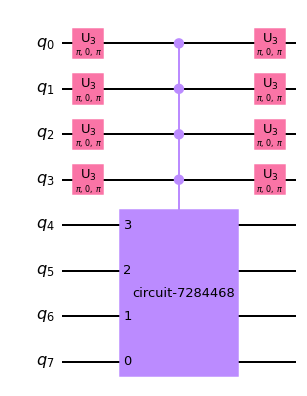

In [106]:
#每走一步，若沒有掉到洞裡或到終點，reward就減1
reward_unitary = [[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                  [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

reward_qc = QuantumCircuit(4)
reward_qc.unitary(reward_unitary,[0,1,2,3])
control_reward = reward_qc.control(4)
control_reward.draw('mpl')
gate_version = control_reward.to_gate()
reward = QuantumCircuit(8,name = 'Walk_Reward')
reward.x([0,1,2,3])
reward.append(gate_version,[0,1,2,3,7,6,5,4])
reward.x([0,1,2,3])
Reward_Gate = reward.to_gate()
reward.decompose().draw('mpl')

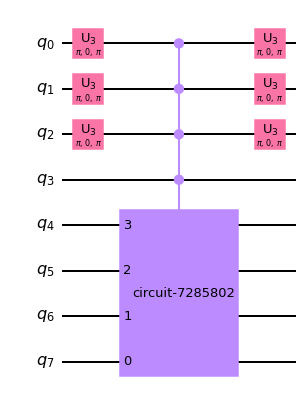

In [107]:
#踩到洞，reward就減4
punish_unitary = [[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                  [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]]
punish_qc = QuantumCircuit(4)
punish_qc.unitary(punish_unitary,[0,1,2,3])
control_punish = punish_qc.control(4)
control_punish.draw('mpl')
gate_punish_version = control_punish.to_gate()
punish = QuantumCircuit(8,name = 'Punish_Reward')
punish.x([0,1,2])
punish.append(gate_punish_version,[0,1,2,3,7,6,5,4])
punish.x([0,1,2])
Punish_Gate = punish.to_gate()
punish.decompose().draw('mpl')

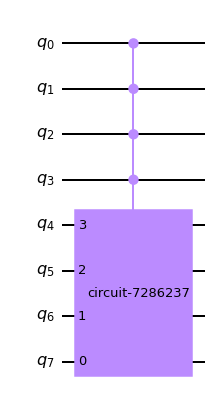

In [108]:
#踩到終點，reward就+1
goal_unitary = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]

goal_qc = QuantumCircuit(4)
goal_qc.unitary(goal_unitary,[0,1,2,3])
control_goal = goal_qc.control(4)
gate_goal_version = control_goal.to_gate()
goal = QuantumCircuit(8,name = 'Goal_Reward')
goal.append(gate_goal_version,[0,1,2,3,7,6,5,4])
Goal_gate = goal.to_gate()
goal.decompose().draw('mpl')

## 拿前面弄好的gate來搭建環境

In [109]:
Environment = QuantumRegister(4, 'environment')
Action1 = QuantumRegister(2, 'action_one')
Action2 = QuantumRegister(2, 'action_two')
Action3 = QuantumRegister(2,'action_three')
Action4 = QuantumRegister(2,'action_four')
Action5 = QuantumRegister(2,'action_five')
End_Qubit = QuantumRegister(4,'end_status')
Reward_Qubit = QuantumRegister(4,'reward')
Readout_bit = ClassicalRegister(16)

In [115]:
circuit = QuantumCircuit(Environment, Action1, Action2, End_Qubit, Reward_Qubit, Readout_bit)
circuit.x([12,13,14,15])
circuit.h([4,5,6,7])
circuit.barrier()

circuit.append(Decision_right_control_unitary,[2,3,4,5,8,9,10,11])
circuit.append(Decision_left_control_unitary,[2,3,4,5,8,9,10,11])
circuit.append(Decision_down_control_unitary,[0,1,4,5,8,9,10,11])
circuit.append(Decision_up_control_unitary,[0,1,4,5,8,9,10,11])
circuit.append(hole1,[0,1,2,3,8,9,10,11])
circuit.append(hole2,[0,1,2,3,8,9,10,11])
circuit.append(hole3,[0,1,2,3,8,9,10,11])
circuit.append(hole4,[0,1,2,3,8,9,10,11])
circuit.append(finish,[0,1,2,3,8,9,10,11])
circuit.append(Reward_Gate,[8,9,10,11,12,13,14,15])
circuit.append(Punish_Gate,[8,9,10,11,12,13,14,15])
circuit.append(Goal_gate,[8,9,10,11,12,13,14,15])

circuit.barrier()

circuit.append(Decision_right_control_unitary,[2,3,6,7,8,9,10,11])
circuit.append(Decision_left_control_unitary,[2,3,6,7,8,9,10,11])
circuit.append(Decision_down_control_unitary,[0,1,6,7,8,9,10,11])
circuit.append(Decision_up_control_unitary,[0,1,6,7,8,9,10,11])
circuit.append(hole1,[0,1,2,3,8,9,10,11])
circuit.append(hole2,[0,1,2,3,8,9,10,11])
circuit.append(hole3,[0,1,2,3,8,9,10,11])
circuit.append(hole4,[0,1,2,3,8,9,10,11])
circuit.append(finish,[0,1,2,3,8,9,10,11])
circuit.append(Reward_Gate,[8,9,10,11,12,13,14,15])
circuit.append(Punish_Gate,[8,9,10,11,12,13,14,15])
circuit.append(Goal_gate,[8,9,10,11,12,13,14,15])

circuit.barrier()
circuit.measure([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0])

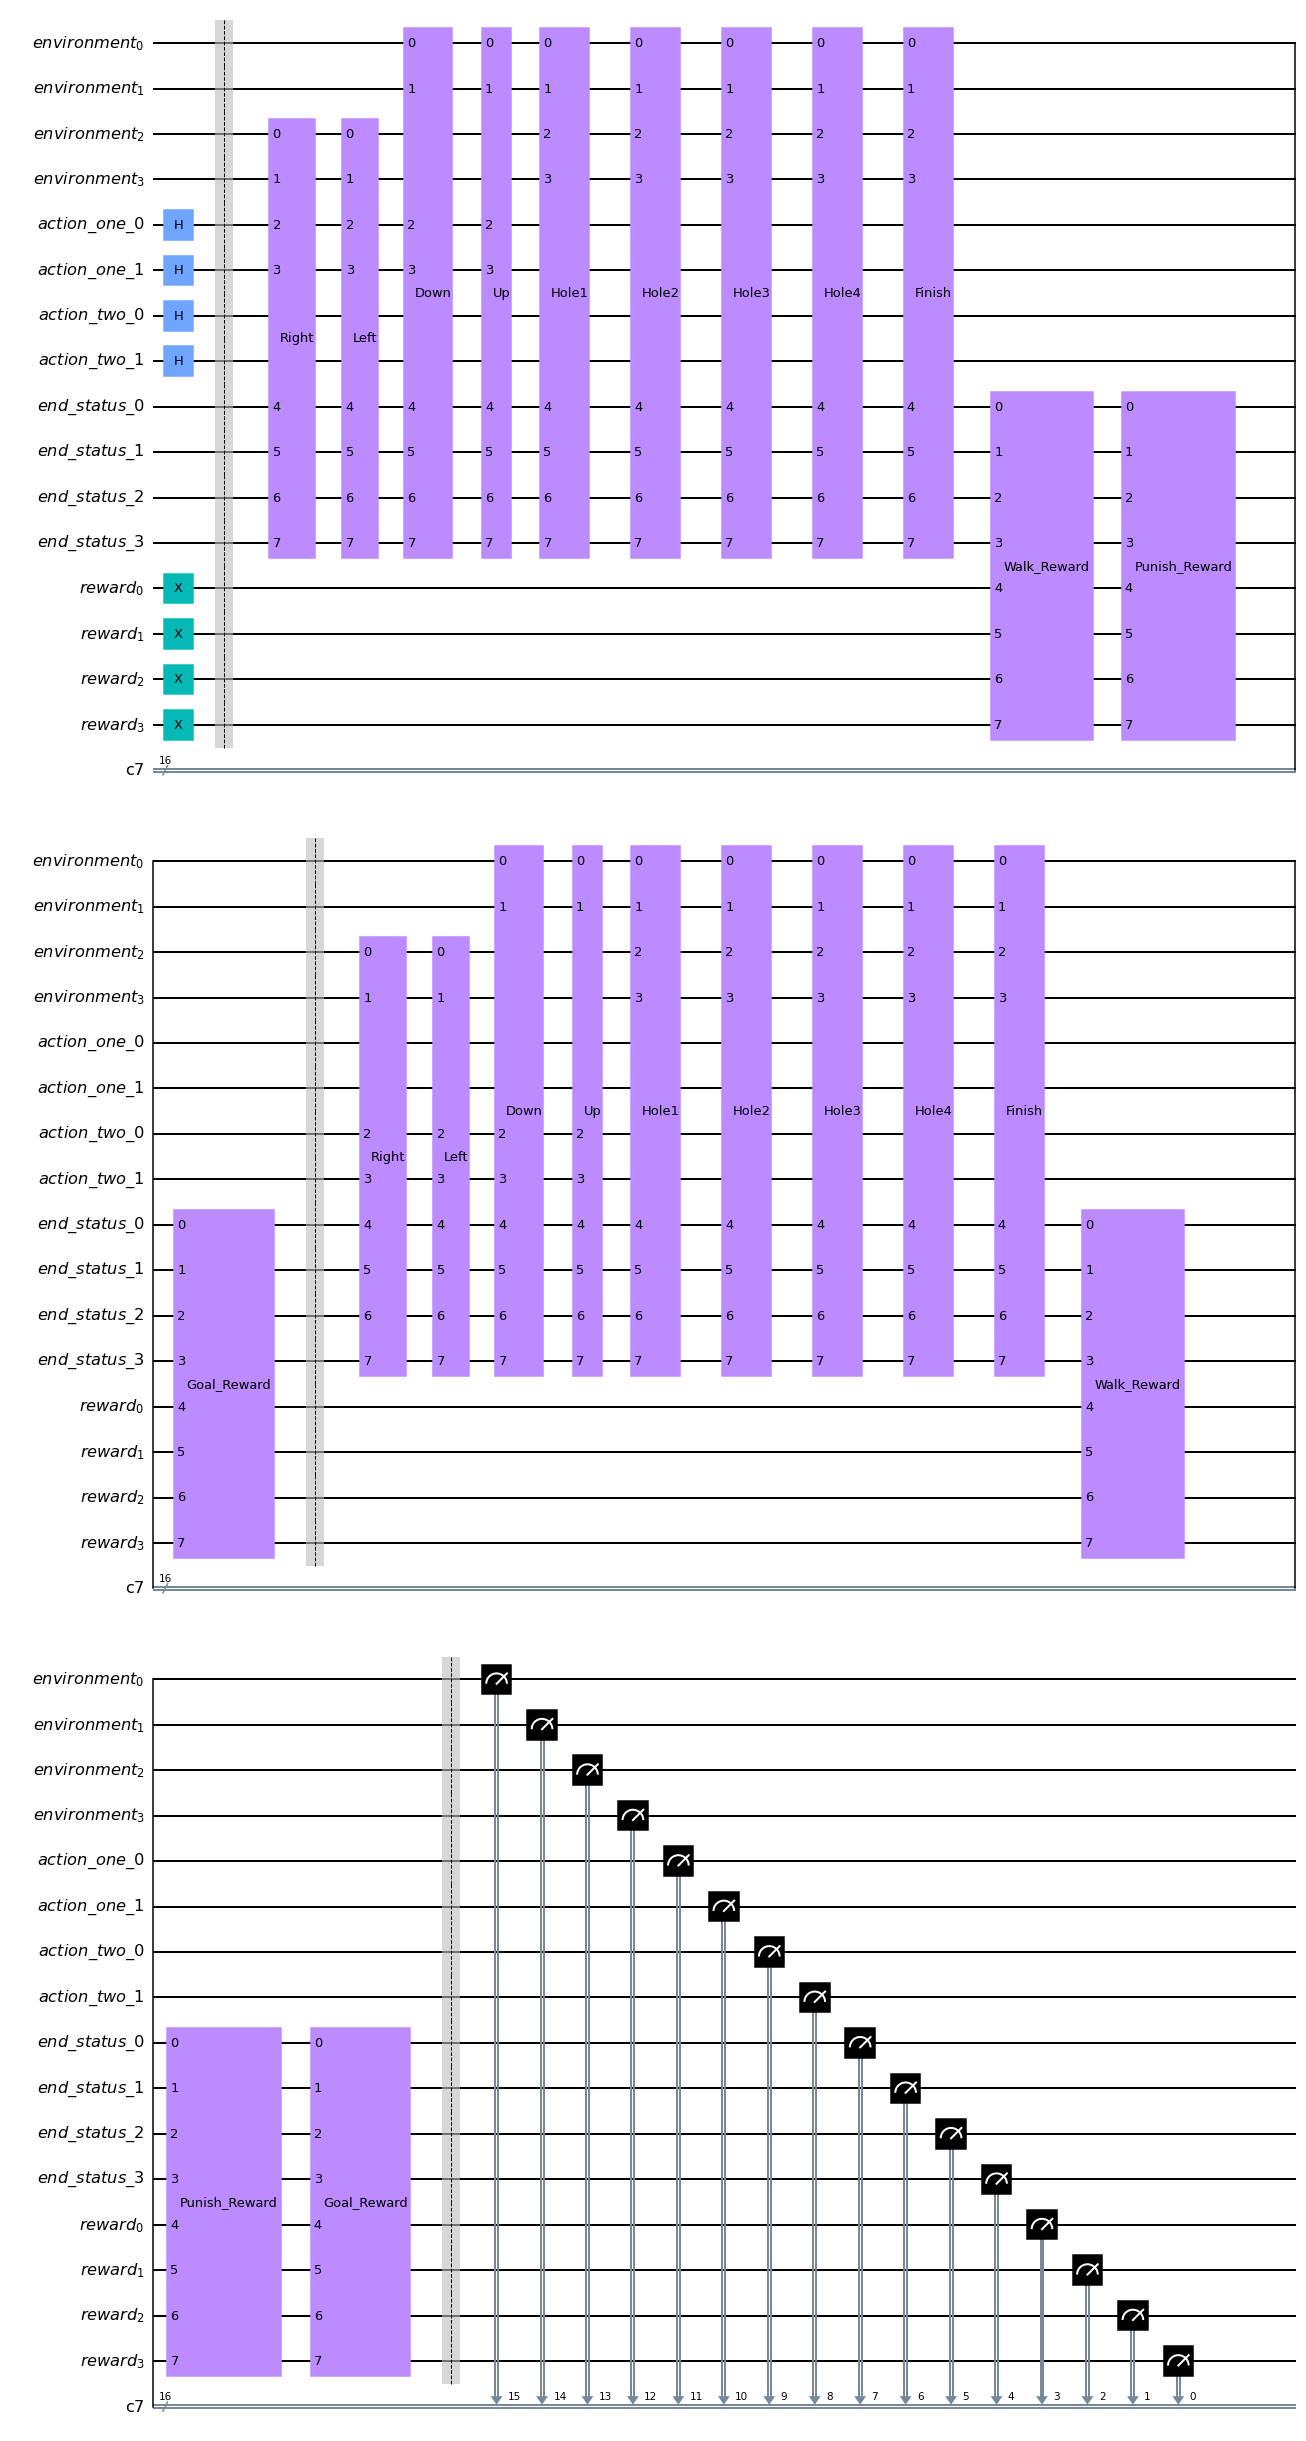

In [116]:
circuit.draw('mpl')

In [117]:
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(circuit, backend)
job_sim = backend.run(qc_compiled, shots=128)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'1100010000101011': 12, '0010000000001101': 7, '0101110000011010': 10, '0000100000001101': 10, '0111111000011010': 17, '0101001100011010': 6, '0000110100001101': 7, '0000001000001101': 5, '0010101000001101': 8, '1100010100101011': 11, '1000111100001101': 8, '1101000100001101': 2, '1111100100001101': 9, '1100011000101011': 6, '1100011100101011': 6, '0111101100011010': 4}
